Importing the data

In [1]:
# Downloading data from mygithub, hich is forked from other resource rslim087a/track
!git clone https://github.com/Arun02DS/Car_sim_img

Cloning into 'Car_sim_img'...
remote: Enumerating objects: 12163, done.
remote: Total 12163 (delta 0), reused 0 (delta 0), pack-reused 12163
Receiving objects: 100% (12163/12163), 156.98 MiB | 32.55 MiB/s, done.
Updating files: 100% (12160/12160), done.


In [2]:
#Importing all the libraries we need
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D,Dropout, Flatten, Dense, Conv2D
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random

In [3]:
#directory of the data, as it is already cloned from git no need to give complete path
datadir = 'Car_sim_img'
#column names
columns = ['center','left','right','steering','throttle','reverse','speed']
#reading csv using pandas
data = pd.read_csv(os.path.join(datadir,'driving_log.csv'),names=columns)
# To see the entire path of the image
pd.set_option("display.max_colwidth",-1)
#visualizing top 5 data points
data.head()

<ipython-input-3-a99ed9ce7b4f>:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth",-1)


center  \
0  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg   

                                                                   left  \
0  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_860.jpg   

                                                                   right  \
0  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_860.jpg   

   steering  throttle  reverse     speed  
0  0.0       0.0       0.0      0.649786  
1  0.0       0.0       0.0      0.627942  
2  0.0       0.0       0.0      0.622910  
3  0.0       0.0       0.0      0.619162  
4  0.0       0.0       0.0      0.615438

In [4]:
# Function to remove the unwanted information from th image name
def path_leaf(path):
  head,tail= ntpath.split(path)
  return tail

In [5]:
# removing extra information using the function
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

center                              left  \
0  center_2018_07_16_17_11_43_382.jpg  left_2018_07_16_17_11_43_382.jpg   
1  center_2018_07_16_17_11_43_670.jpg  left_2018_07_16_17_11_43_670.jpg   
2  center_2018_07_16_17_11_43_724.jpg  left_2018_07_16_17_11_43_724.jpg   
3  center_2018_07_16_17_11_43_792.jpg  left_2018_07_16_17_11_43_792.jpg   
4  center_2018_07_16_17_11_43_860.jpg  left_2018_07_16_17_11_43_860.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2018_07_16_17_11_43_382.jpg  0.0       0.0       0.0      0.649786  
1  right_2018_07_16_17_11_43_670.jpg  0.0       0.0       0.0      0.627942  
2  right_2018_07_16_17_11_43_724.jpg  0.0       0.0       0.0      0.622910  
3  right_2018_07_16_17_11_43_792.jpg  0.0       0.0       0.0      0.619162  
4  right_2018_07_16_17_11_43_860.jpg  0.0       0.0       0.0      0.615438

Analysis and visualization

<BarContainer object of 25 artists>

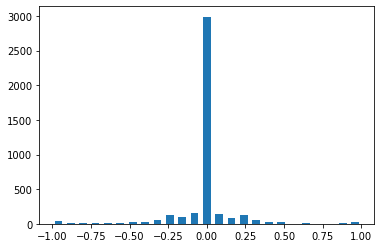

In [6]:
# visualizing the steering angle.
num_bins =25
hist, bins = np.histogram(data['steering'],num_bins)
#Providing the x cordinate of the graph
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist,width=0.05)

As we can observe that data is not balanced, as data point related to center point are more. So, if we train our model based on this, it will be baised model.

Correcting Data Imbalance

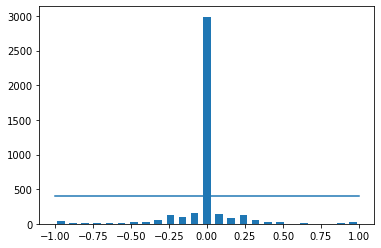

In [7]:
# visualizing the steering angle.
num_bins =25
samples_per_bin=400
hist, bins = np.histogram(data['steering'],num_bins)
#Providing the x cordinate of the graph
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist,width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin,samples_per_bin))

In [8]:
# Data before removing more zeros
print("total data: ", len(data))
print(data.shape)

total data:  4053
(4053, 7)


In [9]:
#removing extra zeros from the dataset to make a good model

remove_list =[]
for j in range(num_bins):
  list_=[]
  for i in range(len(data['steering'])):
    if data['steering'][i] > bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_=shuffle(list_)
  list_=list_[samples_per_bin:]
  remove_list.extend(list_)

print('removed : ', len(remove_list))
data.drop(data.index[remove_list],inplace=True)
print('remaining :',len(data))

removed :  2590
remaining : 1463


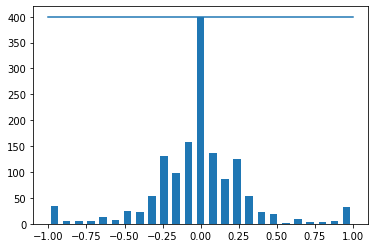

In [10]:
#visualising the data again
hist, bins = np.histogram(data['steering'],num_bins)
plt.bar(center, hist,width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin,samples_per_bin))

 Training set, Validation set

In [11]:
# Function to get the path of the images with their corresponding steering angle.
def load_img_steering(datadir,df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data= data.iloc[i]
    center,left,right= indexed_data[0],indexed_data[1],indexed_data[2]
    #center Image append
    image_path.append(os.path.join(datadir,center.strip()))
    steering.append(float(indexed_data[3]))
    #left image append
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)
    #right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)
  image_paths=np.asarray(image_path)
  steerings=np.asarray(steering)
  return image_paths, steerings

In [12]:
image_paths, steerings = load_img_steering(datadir + "/IMG",data)

In [13]:
image_paths

array(['Car_sim_img/IMG/center_2018_07_16_17_11_44_137.jpg',
       'Car_sim_img/IMG/left_2018_07_16_17_11_44_137.jpg',
       'Car_sim_img/IMG/right_2018_07_16_17_11_44_137.jpg', ...,
       'Car_sim_img/IMG/center_2018_07_16_17_16_30_704.jpg',
       'Car_sim_img/IMG/left_2018_07_16_17_16_30_704.jpg',
       'Car_sim_img/IMG/right_2018_07_16_17_16_30_704.jpg'], dtype='<U50')

In [14]:
len(image_paths)

4389

In [15]:
steerings

array([ 0.  ,  0.15, -0.15, ...,  0.  ,  0.15, -0.15])

In [16]:
len(steerings)

4389

In [17]:
X_train,X_valid,y_train,y_valid = train_test_split(image_paths,steerings,test_size=0.2,random_state=42)
print(f"training Smaples: {len(X_train)} \n Validating Samples: {len(X_valid)}")

training Smaples: 3511 
 Validating Samples: 878


Text(0.5, 1.0, 'Validation set')

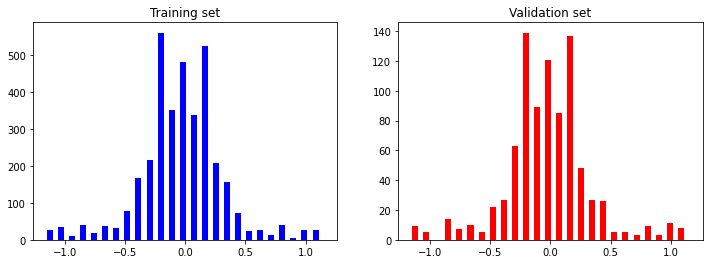

In [18]:
#Plotting the training and validation set
fig,axes=plt.subplots(1,2,figsize=(12,4))
axes[0].hist(y_train,bins=num_bins,width=0.05,color='blue')
axes[0].set_title("Training set")
axes[1].hist(y_valid,bins=num_bins,width=0.05,color='red')
axes[1].set_title("Validation set")

Our Training set and vaidation set has same distribution. So, we are good to go to the nest step.

Data Augumentation

In [19]:
#Image augumentation : ZOOM Image
def zoom(image):
  zoom=iaa.Affine(scale=(1,1.3))
  image=zoom.augment_image(image)
  return image


Text(0.5, 1.0, 'Zoomed_image')

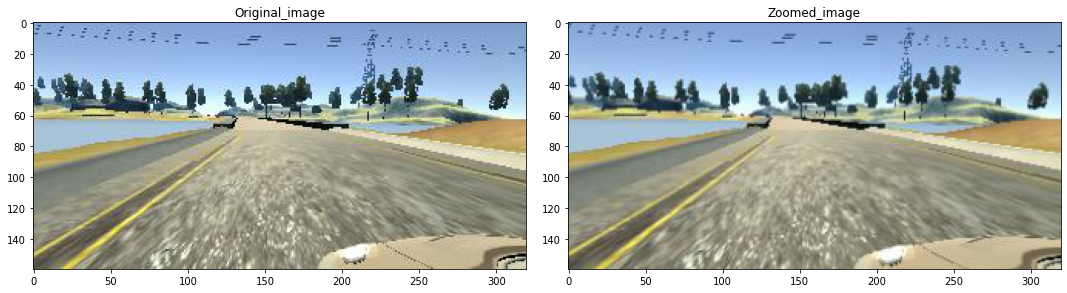

In [20]:
#vizualizling the zoomed image
image=image_paths[random.randint(0,1000)]
original_image = plt.imread(image)
zoomed_image =zoom(original_image)

fig,axes=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()

axes[0].imshow(original_image)
axes[0].set_title('Original_image')

axes[1].imshow(zoomed_image)
axes[1].set_title('Zoomed_image')


In [21]:
#Image Augumentation : Pan
def pan(image):
  pan =iaa.Affine(translate_percent = {"x":(-0.1,0.1),"y":(-0.1,0.1)})
  image = pan.augment_image(image)
  return image

Text(0.5, 1.0, 'Panned_image')

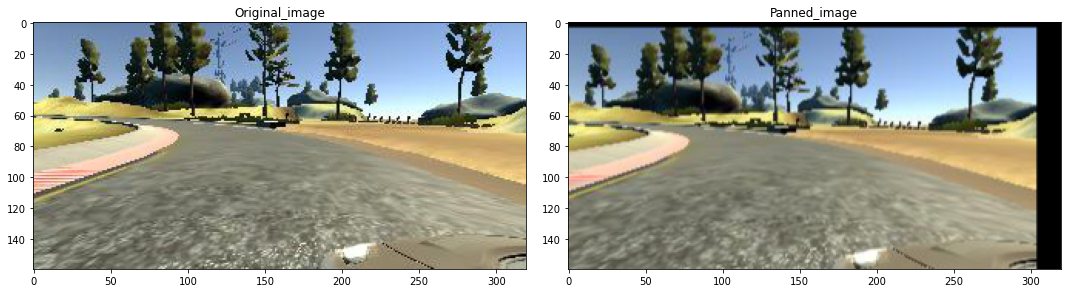

In [22]:
#Visualizing the pan image
image=image_paths[random.randint(0,1000)]
original_image = plt.imread(image)
pan_image =pan(original_image)

fig,axes=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()

axes[0].imshow(original_image)
axes[0].set_title('Original_image')

axes[1].imshow(pan_image)
axes[1].set_title('Panned_image')

In [23]:
# Image Agumentation : Brightness of image
def img_random_brightness(image):
  brightness= iaa.Multiply((0.2,1.2))
  image = brightness.augment_image(image)
  return image

Text(0.5, 1.0, 'Bright_image')

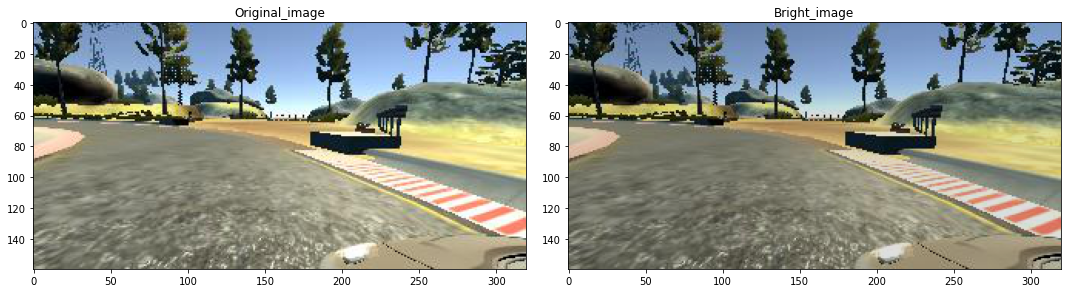

In [24]:
#vizualizing the image
image=image_paths[random.randint(0,1000)]
original_image = plt.imread(image)
bright_image =img_random_brightness(original_image)

fig,axes=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()

axes[0].imshow(original_image)
axes[0].set_title('Original_image')

axes[1].imshow(bright_image)
axes[1].set_title('Bright_image')

In [25]:
# Image Augumentation : Image flip
def img_random_flip(image,steering_angle):
  image = cv2.flip(image,1)
  steering_angle = -steering_angle
  return image, steering_angle

Text(0.5, 1.0, 'Flipped_image Steering angle0.7787026')

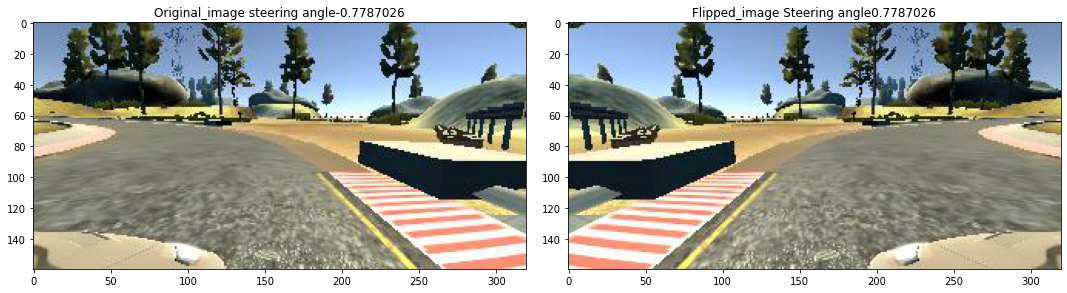

In [26]:
# vizualizing the flipped image
random_index = random.randint(0,1000)
image=image_paths[random_index]
steering_angle = steerings[random_index]


original_image = plt.imread(image)
flipped_image , flipped_steering_angle =img_random_flip(original_image, steering_angle)

fig,axes=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()

axes[0].imshow(original_image)
axes[0].set_title('Original_image ' + 'steering angle' + str(steering_angle))

axes[1].imshow(flipped_image)
axes[1].set_title('Flipped_image ' + 'Steering angle' + str(flipped_steering_angle))


In [27]:
# Function to add augumented images to batch

def random_augument(image,steering_angle):
  image=mpimg.imread(image)
  if np.random.rand() < 0.5:
    image = pan(image)
  
  if np.random.rand() <0.5:
    image = zoom(image)

  if np.random.rand() < 0.5:
    image = img_random_brightness(image)

  if np.random.rand() < 0.5:
    image, steering_angle = img_random_flip(image,steering_angle)
  
  return image,steering_angle

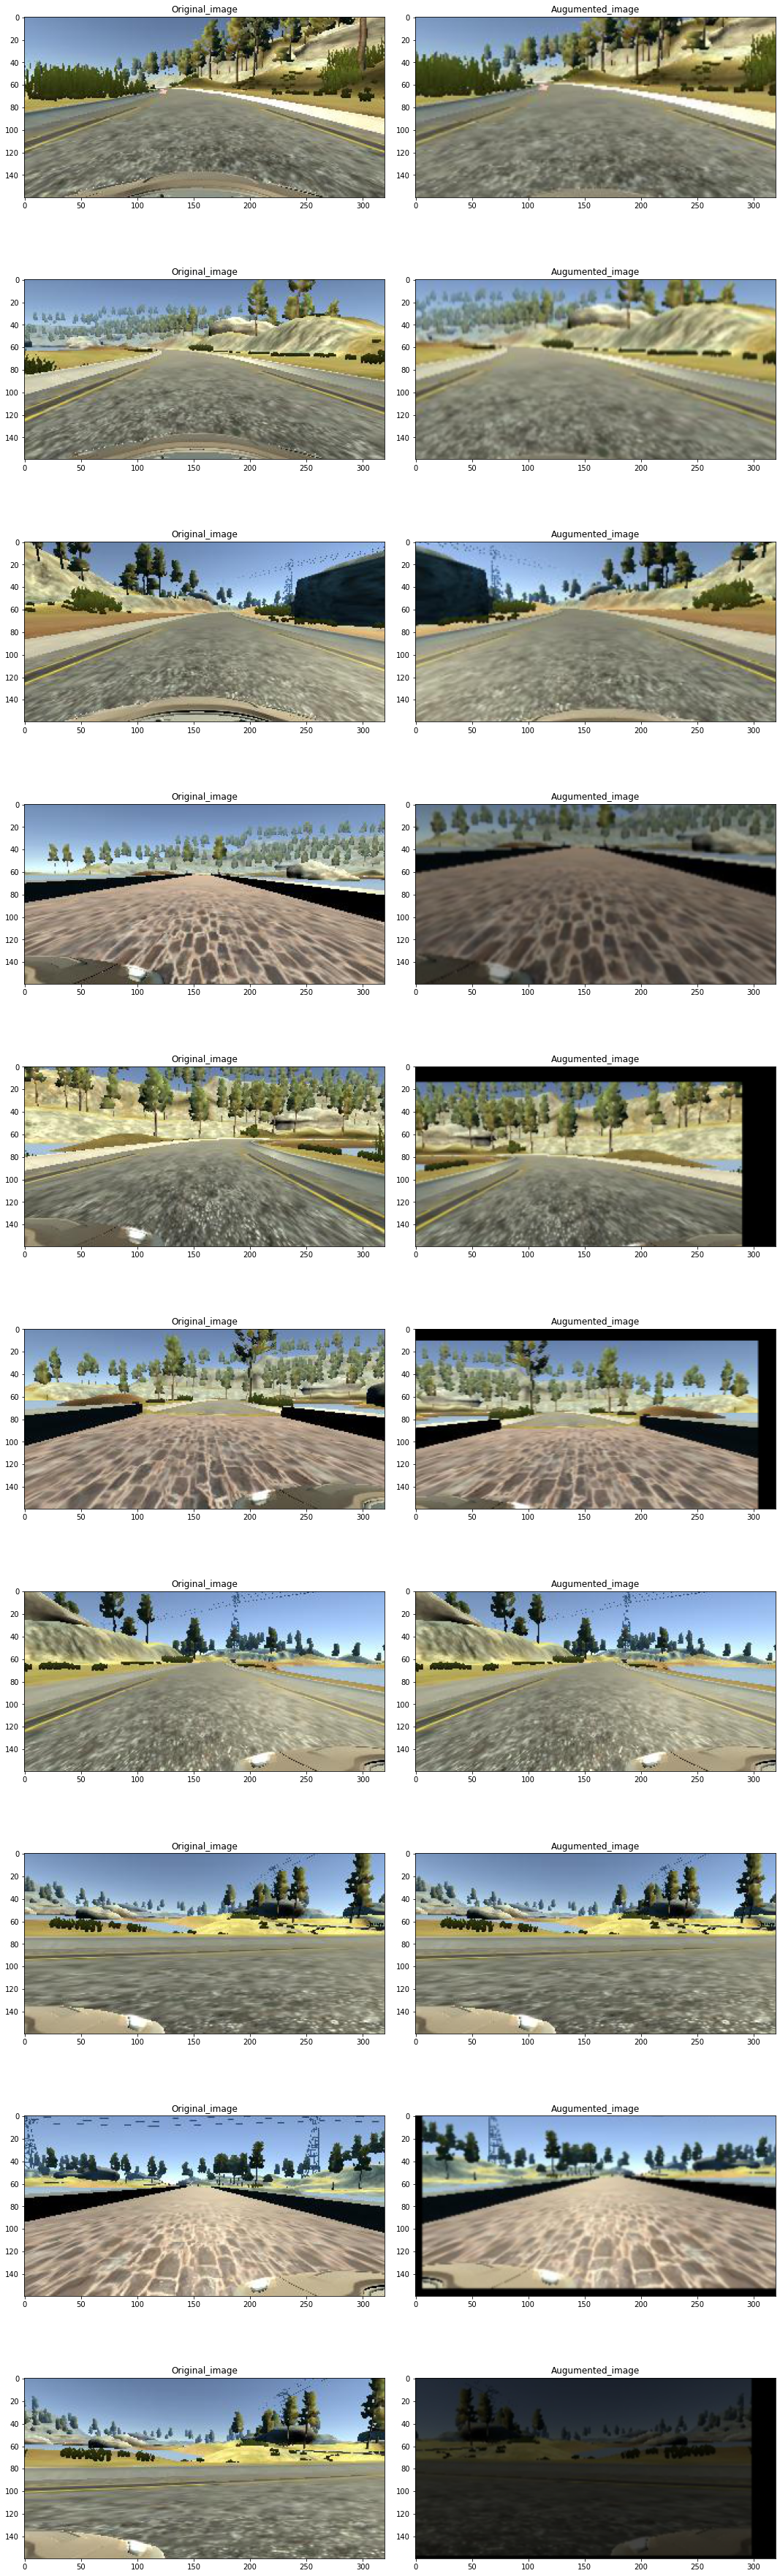

In [28]:
#visualizing reesults of the above function

ncol=2
nrow=10

fig,axes=plt.subplots(nrow,ncol,figsize=(15,50))
fig.tight_layout()

for i in range(10):
  randnum = random.randint(0,len(image_paths)-1)
  random_image=image_paths[randnum]
  random_steering = steerings[randnum]

  original_image = mpimg.imread(random_image)
  augumented_image ,steering = random_augument(random_image,random_steering)

  axes[i][0].imshow(original_image)
  axes[i][0].set_title('Original_image')

  axes[i][1].imshow(augumented_image)
  axes[i][1].set_title('Augumented_image')





Image Preprocessing

Images have background which will be computationally expensive. also, we only need road. We will crop the images  and select only roads.

In [29]:
#cropping image and apply some methods to make it perfect for Nvidia model
def img_preprocessing(img):
  img=img[60:135,:,:]
  img=cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
  img=cv2.GaussianBlur(img, (3,3),0)
  img=cv2.resize(img,(200,66))
  img=img/255
  return img

Text(0.5, 1.0, 'Preprocessed_image ')

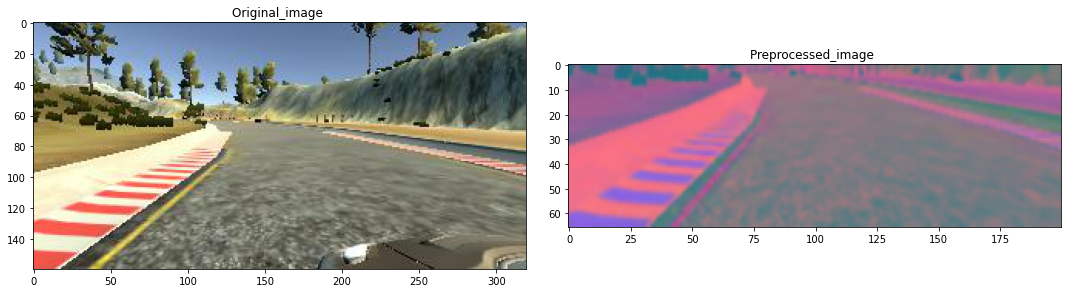

In [30]:
# testing above function 
image =image_paths[100]
original_image = mpimg.imread(image)
Preprocessed_image = img_preprocessing(original_image)

fig,axes=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()

axes[0].imshow(original_image)
axes[0].set_title('Original_image ')

axes[1].imshow(Preprocessed_image)
axes[1].set_title('Preprocessed_image ')

Batch Generator

In [31]:
!nvidia-smi

Tue Feb 21 23:23:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [32]:
def batch_generator(image_paths,steering_ang,batch_size,istraining):

  while True:
    batch_img = []
    batch_steering = []

    for i in range(batch_size):
      random_index = random.randint(0,len(image_paths)-1)

      if istraining:
        im,steering = random_augument(image_paths[random_index],steering_ang[random_index])

      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]

      im = img_preprocessing(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))



In [33]:
# Checking above function 
X_train_gen, y_train_gen= next(batch_generator(X_train,y_train,1,1))
X_valid_gen, y_valid_gen= next(batch_generator(X_valid,y_valid,1,0))

Text(0.5, 1.0, 'Validation Image')

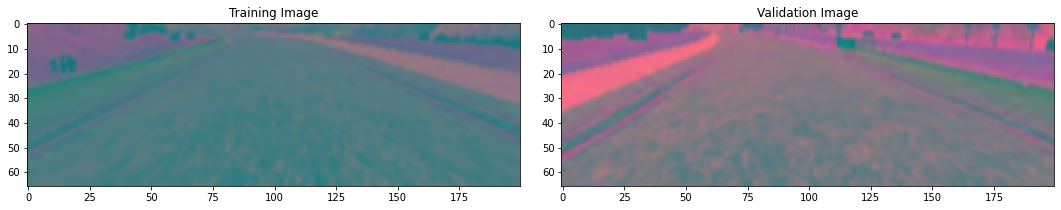

In [34]:
#visualizing the generated data
fig,axes=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()

axes[0].imshow(X_train_gen[0])
axes[0].set_title('Training Image')

axes[1].imshow(X_valid_gen[0])
axes[1].set_title('Validation Image')

Nvidia Model

In [35]:

def nvidia_model():
  model = Sequential()
  model.add(Conv2D(24,(5,5),strides=(2,2),input_shape=(66,200,3),activation='elu'))
  model.add(Conv2D(36,(5,5),strides=(2,2),activation='elu'))
  model.add(Conv2D(48,(5,5),strides=(2,2),activation='elu'))
  model.add(Conv2D(64,(5,5),activation='elu'))

  model.add(Flatten())

  model.add(Dense(100, activation='elu'))

  model.add(Dense(50, activation='elu'))

  model.add(Dense(10, activation='elu'))

  model.add(Dense(1))

  optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
  model.compile(loss='mse',optimizer=optimizer)
  return model

model = nvidia_model()
print(model.summary())







Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 1, 18, 64)         76864     
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 100)               115300    
                                                                 
 dense_1 (Dense)             (None, 50)                5

Model Training

In [36]:
history = model.fit_generator(batch_generator(X_train,y_train,100,1),
                              steps_per_epoch=300,
                              epochs = 50,
                              validation_data=batch_generator(X_valid,y_valid,100,0),
                              validation_steps=200,
                              verbose = 1,
                              shuffle = 1)

<ipython-input-36-41dbc646d97f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(batch_generator(X_train,y_train,100,1),


Epoch 1/50
300/300 [==============================] - 152s 465ms/step - loss: 0.1048 - val_loss: 0.0704
Epoch 2/50
300/300 [==============================] - 137s 459ms/step - loss: 16.8977 - val_loss: 0.1245
Epoch 3/50
300/300 [==============================] - 136s 456ms/step - loss: 0.1231 - val_loss: 0.1225
Epoch 4/50
300/300 [==============================] - 135s 450ms/step - loss: 0.1111 - val_loss: 0.1161
Epoch 5/50
300/300 [==============================] - 136s 455ms/step - loss: 0.1083 - val_loss: 0.1099
Epoch 6/50
300/300 [==============================] - 134s 448ms/step - loss: 0.1084 - val_loss: 0.0999
Epoch 7/50
300/300 [==============================] - 134s 447ms/step - loss: 0.1012 - val_loss: 0.0917
Epoch 8/50
300/300 [==============================] - 134s 446ms/step - loss: 0.0922 - val_loss: 0.0828
Epoch 9/50
300/300 [==============================] - 133s 446ms/step - loss: 0.0901 - val_loss: 0.0773
Epoch 10/50
300/300 [==============================] - 131s 439

Text(0.5, 0, 'Epoch')

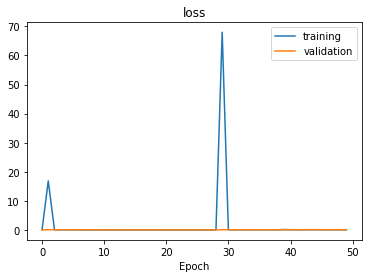

In [37]:
# Plotting the loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('Epoch')


In [39]:
model.save('model.h5')
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Converting file to pdf

File ‘colab_pdf.py’ already there; not retrieving.





E: Unable to locate package texlive-generic-recommended
[NbConvertApp] WARNING | pattern '$notebookpath$file_name' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y

'File Download Unsuccessful. Saved in Google Drive'

SyntaxError: ignored

cp: cannot stat 'drive/MyDrive/ColabNotebooks/Self_driving_car.ipynb': No such file or directory
